In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# EAD and Data preparation

In [3]:
train_df.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160,0,-
1,2,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,372,122,-
2,3,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260,1004,-
3,4,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,300,0,-
4,5,?,26.5,2.710,y,p,?,?,0.085,f,f,0,f,s,80,0,-


In [4]:
test_df.head()

,Key,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,1,b,31.83,0.04,y,p,m,v,0.040,f,f,0,f,g,0,0
1,2,a,21.75,11.75,u,g,c,v,0.250,f,f,0,t,g,180,0
2,3,a,17.92,0.54,u,g,c,v,1.750,f,t,1,t,g,80,5
3,4,b,30.33,0.50,u,g,d,h,0.085,f,f,0,t,s,252,0
4,5,b,51.83,2.04,y,p,ff,ff,1.500,f,f,0,f,g,120,1


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
Key               590 non-null int64
Male              590 non-null object
Age               590 non-null object
Debt              590 non-null float64
Married           590 non-null object
BankCustomer      590 non-null object
EducationLevel    590 non-null object
Ethnicity         590 non-null object
YearsEmployed     590 non-null float64
PriorDefault      590 non-null object
Employed          590 non-null object
CreditScore       590 non-null int64
DriversLicense    590 non-null object
Citizen           590 non-null object
ZipCode           590 non-null object
Income            590 non-null int64
Approved          590 non-null object
dtypes: float64(2), int64(3), object(12)
memory usage: 78.4+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
Key               100 non-null int64
Male              100 non-null object
Age               100 non-null float64
Debt              100 non-null float64
Married           100 non-null object
BankCustomer      100 non-null object
EducationLevel    100 non-null object
Ethnicity         100 non-null object
YearsEmployed     100 non-null float64
PriorDefault      100 non-null object
Employed          100 non-null object
CreditScore       100 non-null int64
DriversLicense    100 non-null object
Citizen           100 non-null object
ZipCode           100 non-null int64
Income            100 non-null int64
dtypes: float64(3), int64(4), object(9)
memory usage: 12.6+ KB


In [7]:
train_df.describe()

,Key,Debt,YearsEmployed,CreditScore,Income
count,590.000000,590.000000,590.000000,590.000000,590.000000
mean,295.500000,4.609390,2.088534,2.045763,918.706780
std,170.462606,4.849569,3.198681,3.702375,5025.415369
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,148.250000,1.000000,0.165000,0.000000,0.000000
50%,295.500000,2.710000,1.000000,0.000000,4.000000
75%,442.750000,7.000000,2.500000,2.000000,363.000000
max,590.000000,26.335000,20.000000,20.000000,100000.000000


In [8]:
train_df.describe(include="O")

,Male,Age,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Approved
count,590,590,590,590,590,590,590,590,590,590,590,590
unique,3,322,4,4,15,10,2,2,2,3,156,2
top,b,?,u,g,c,v,f,f,f,g,0,-
freq,400,12,434,434,119,341,299,350,327,530,106,358


In [9]:
# creating a new Series 'total' that sums the number of empyt cells 'NA' in each column 
# The result is then sorted from highest to lowest 
total = train_df.isnull().sum().sort_values(ascending=False)
# Now, we get calculate the percentage and sort the values in 'percent'
percent = (train_df.isnull().sum()/train_df.isnull().count()*100).sort_values(ascending=False)
#Now, we concat the two Serieses (total, percent) in a new DataFrame and we print the top 3 
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Approved,0,0.0
Ethnicity,0,0.0
Male,0,0.0
Age,0,0.0
Debt,0,0.0


In [10]:
train_df['Male'].value_counts()

b    400
a    179
?     11
Name: Male, dtype: int64

In [11]:
train_df['Approved'].value_counts()

-    358
+    232
Name: Approved, dtype: int64

In [12]:
train_df['Married'].value_counts()

u    434
y    148
?      6
l      2
Name: Married, dtype: int64

In [13]:
train_df['BankCustomer'].value_counts()

g     434
p     148
?       6
gg      2
Name: BankCustomer, dtype: int64

In [14]:
train_df['EducationLevel'].value_counts()

c     119
q      65
i      53
w      51
aa     50
ff     49
k      45
x      33
m      30
cc     29
d      24
e      21
j      10
?       9
r       2
Name: EducationLevel, dtype: int64

In [15]:
train_df['Ethnicity'].value_counts()

v     341
h     104
bb     55
ff     53
?       9
z       8
j       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

In [16]:
train_df['Citizen'].value_counts()

g    530
s     52
p      8
Name: Citizen, dtype: int64

In [17]:
train_df['Income'].value_counts()

0       257
1        26
1000     10
500       8
6         8
5         7
2         7
4         5
100       5
3000      4
7         4
200       4
10        4
20        4
300       4
50        3
600       3
18        3
150       3
3         3
2000      3
350       2
540       2
67        2
68        2
99        2
1210      2
3065      2
351       2
1200      2
       ... 
247       1
1065      1
234       1
2279      1
228       1
7544      1
396       1
582       1
484       1
1391      1
1602      1
567       1
560       1
1583      1
6700      1
1270      1
4607      1
501       1
3552      1
4500      1
475       1
2510      1
458       1
456       1
2503      1
6590      1
1465      1
5552      1
1430      1
251       1
Name: Income, Length: 210, dtype: int64

In [18]:
train_df['Age'].value_counts()

?        12
22.67     8
22.5      6
20.67     6
23.58     6
18.83     6
20.42     6
25        5
27.67     5
24.5      5
19.17     5
23.08     5
33.17     4
28.58     4
23.5      4
26.17     4
23        4
24.58     4
20        4
25.17     4
24.75     4
32.33     4
28.67     3
21.17     3
28.17     3
18.58     3
36.17     3
26.75     3
20.75     3
22.17     3
         ..
21.58     1
36.58     1
35.42     1
44.17     1
22.33     1
20.33     1
41.75     1
71.58     1
26.5      1
27.17     1
33.5      1
15.83     1
27.42     1
42.25     1
56        1
55.75     1
48.08     1
28.42     1
38.17     1
63.33     1
30.58     1
58.33     1
67.75     1
18.5      1
46.67     1
49.17     1
29.67     1
38.25     1
69.5      1
34.92     1
Name: Age, Length: 322, dtype: int64

# So '?' represent the missing values

# There are a few missing values so we can use the most common value(mode) exept age culomn

In [19]:
data = [train_df, test_df]

for dataset in data:
    dataset['Male'] = dataset['Male'].replace('?', 'b')
    dataset['Married'] = dataset['Married'].replace('?', "u")
    dataset['BankCustomer'] = dataset['BankCustomer'].replace('?', "g")
    dataset['EducationLevel'] = dataset['EducationLevel'].replace('?', "c")
    dataset['Ethnicity'] = dataset['Ethnicity'].replace('?', "v")
    dataset["Age"]=dataset["Age"].replace('?', np.nan)

In [20]:
train_df.describe(include="O")

,Male,Age,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Approved
count,590,578,590,590,590,590,590,590,590,590,590,590
unique,2,321,3,3,14,9,2,2,2,3,156,2
top,b,22.67,u,g,c,v,f,f,f,g,0,-
freq,411,8,440,440,128,350,299,350,327,530,106,358


In [21]:
train_df["Age"]=train_df["Age"].astype(str).astype(float)
test_df["Age"]=test_df["Age"].astype(str).astype(float)




In [22]:
train_df.describe(include="O")

,Male,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Approved
count,590,590,590,590,590,590,590,590,590,590,590
unique,2,3,3,14,9,2,2,2,3,156,2
top,b,u,g,c,v,f,f,f,g,0,-
freq,411,440,440,128,350,299,350,327,530,106,358


In [23]:
train_df["Age"].isnull().sum()

12

In [24]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int) #Convert Age to int.
train_df["Age"].isnull().sum()

0

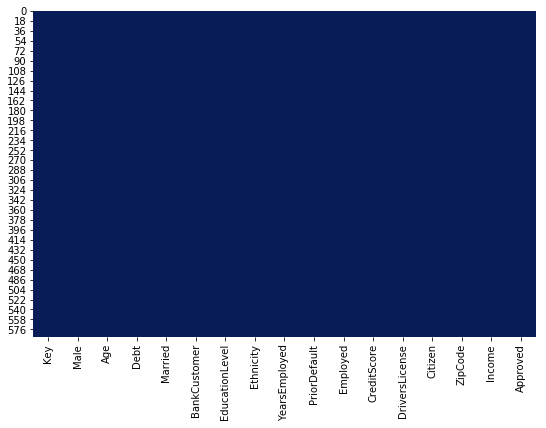

In [25]:
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(train_df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

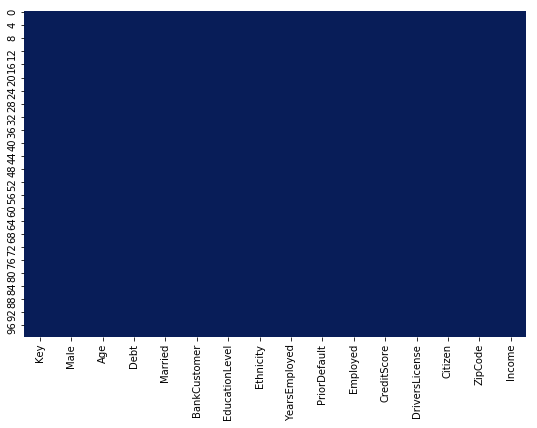

In [26]:
fig, ax = plt.subplots(figsize=(9,6))
sns.heatmap(test_df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

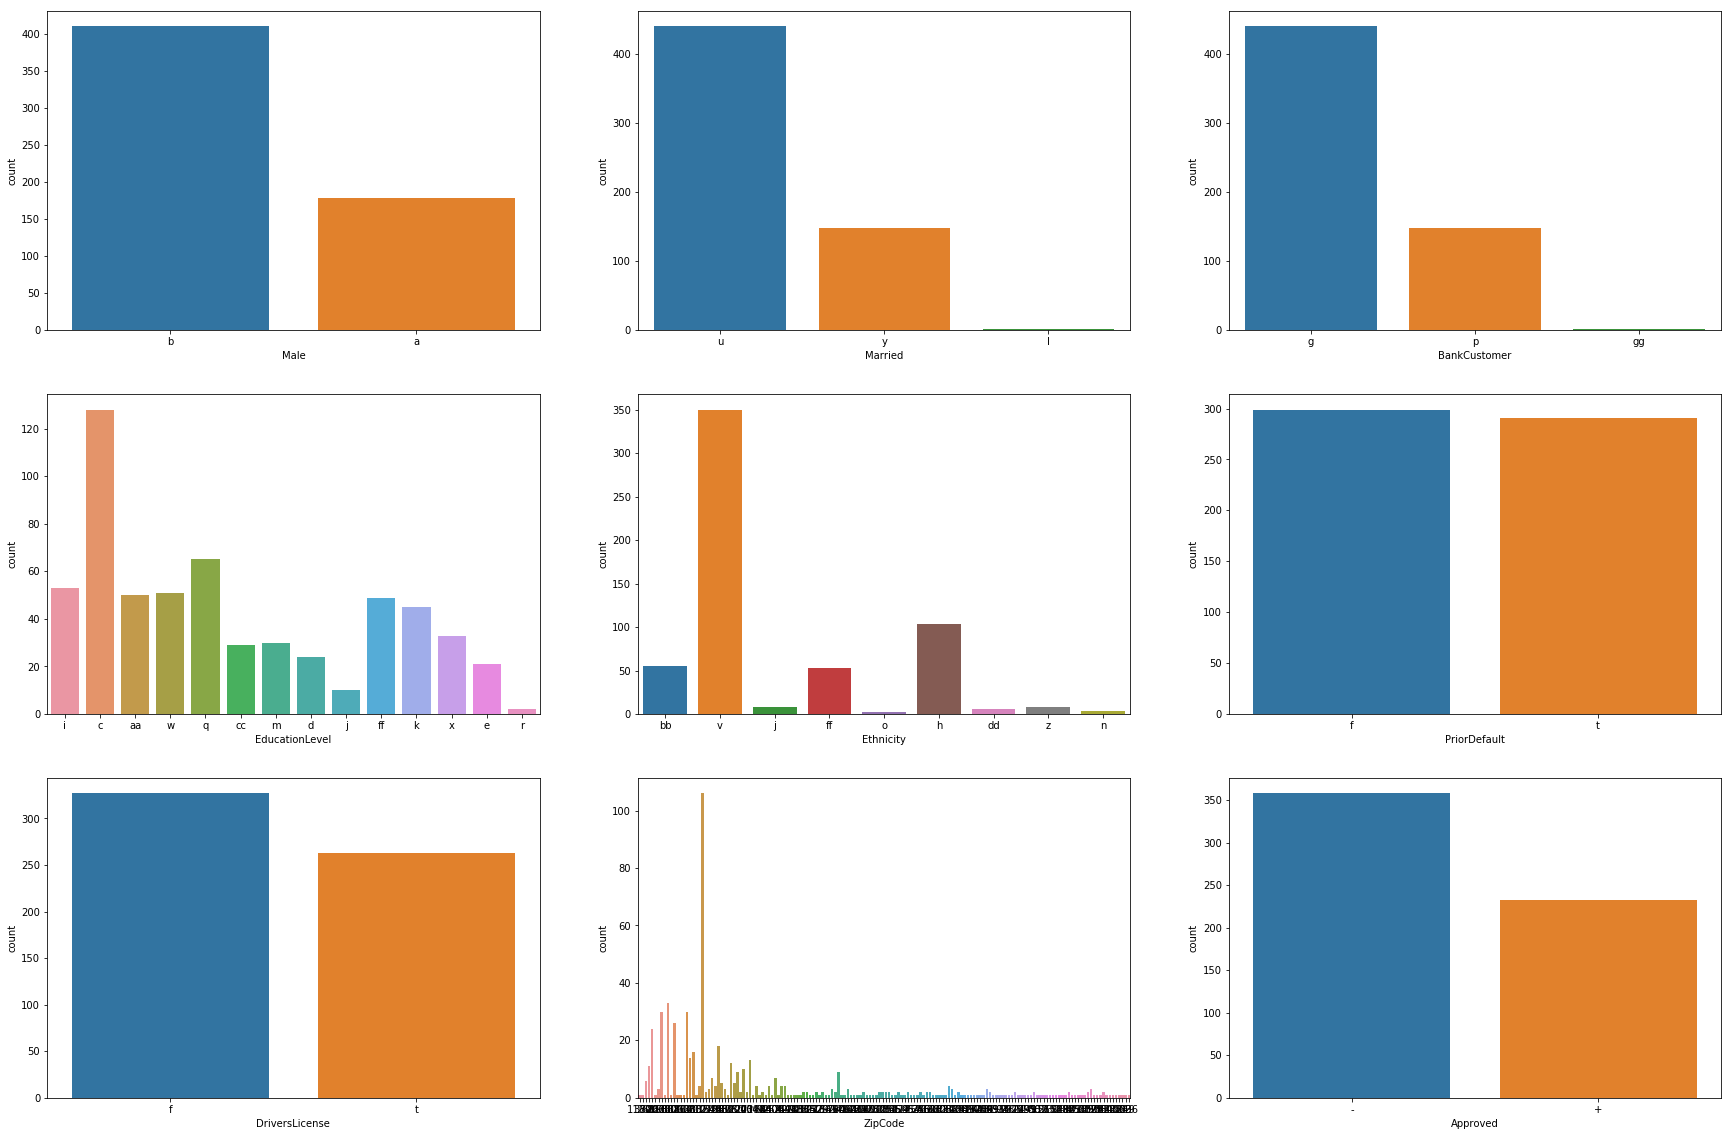

In [27]:
categ_features =  [ 'Male', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault',
                   'DriversLicense', 'ZipCode', 'Approved']


#Distribution
fig = plt.figure(figsize=(30, 20))

for i in range (0,len(categ_features)):
    fig.add_subplot(3,3,i+1)
    sns.countplot(x=categ_features[i], data=train_df)

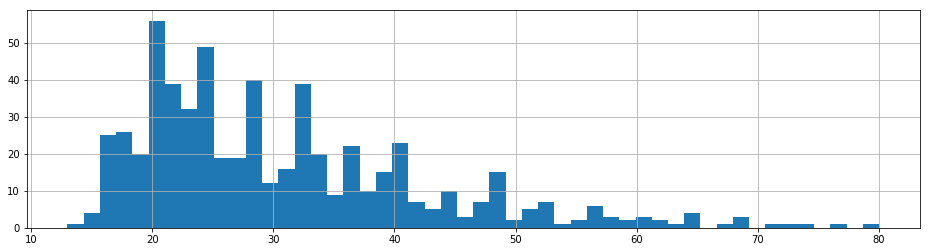

In [28]:
pd.Series(train_df['Age']).hist(figsize=(16,4), bins=50);

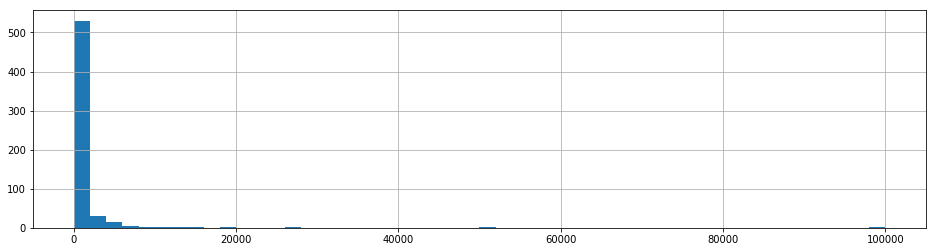

In [29]:
pd.Series(train_df['Income']).hist(figsize=(16,4), bins=50);

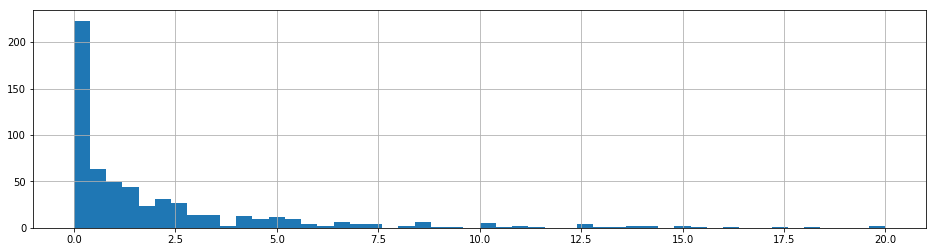

In [30]:
pd.Series(train_df['YearsEmployed']).hist(figsize=(16,4), bins=50);

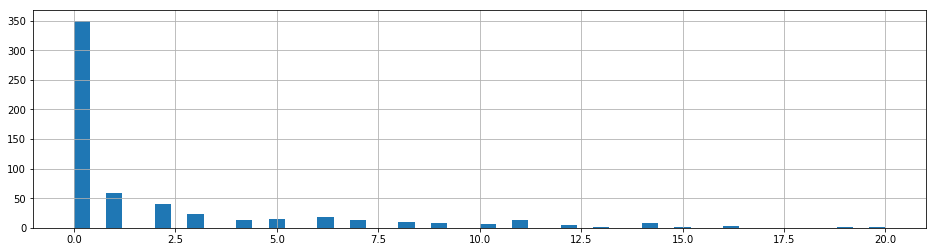

In [31]:
pd.Series(train_df['CreditScore']).hist(figsize=(16,4), bins=50);

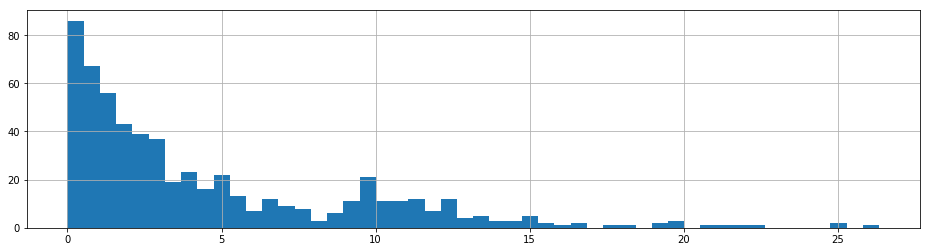

In [32]:
pd.Series(train_df['Debt']).hist(figsize=(16,4), bins=50);

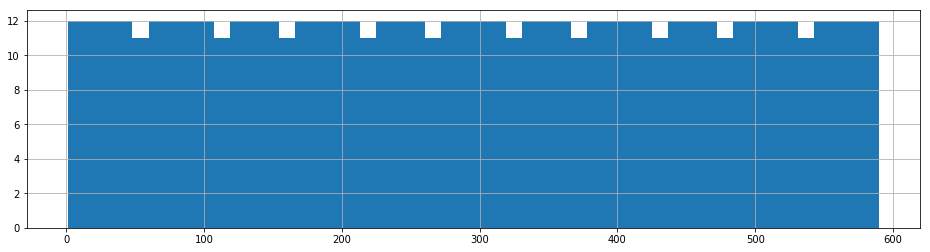

In [33]:
pd.Series(train_df['Key']).hist(figsize=(16,4), bins=50);

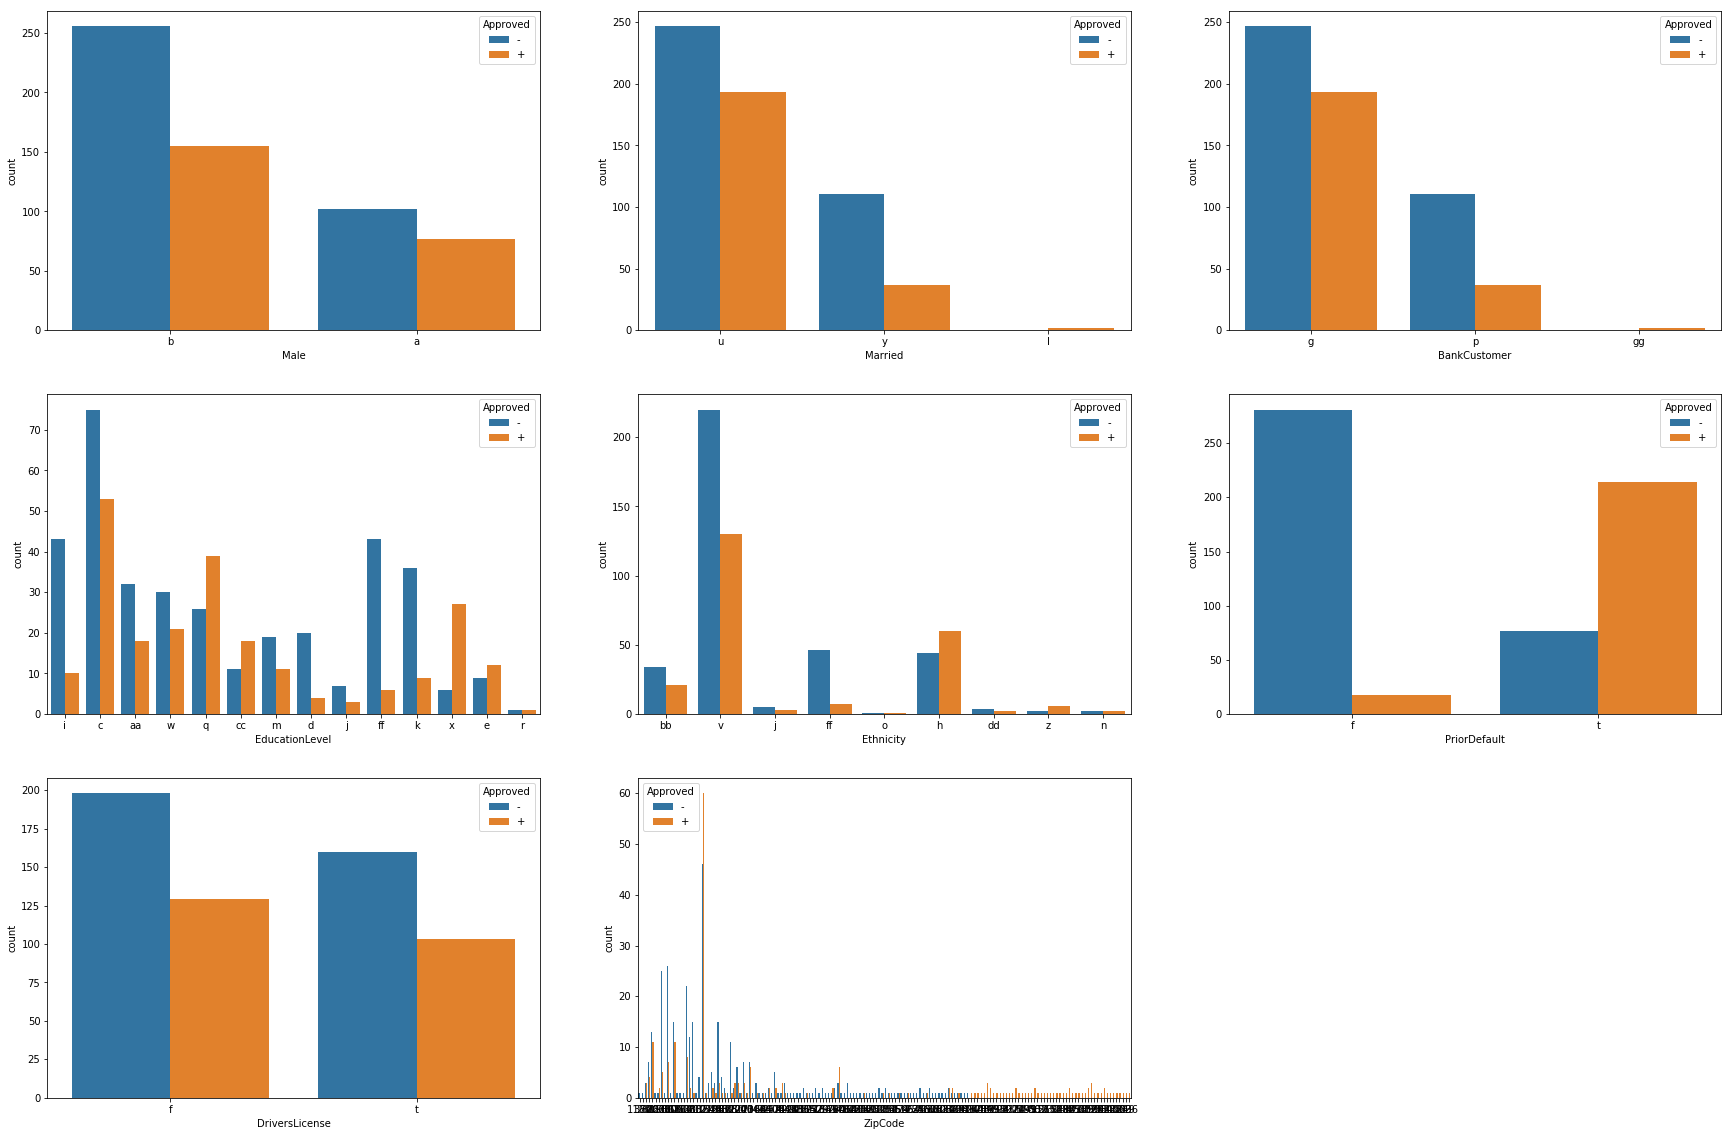

In [34]:
fig = plt.figure(figsize=(30, 20))
i = 1
for col in categ_features:
    if col != 'Approved':
        fig.add_subplot(3,3,i)
        sns.countplot(x=col, data=train_df,hue='Approved');
        i += 1

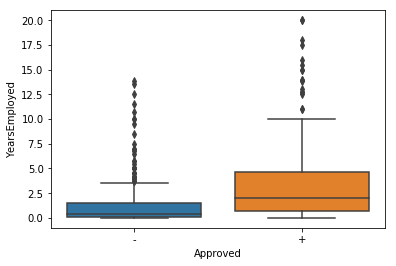

In [35]:

sns.boxplot(x="Approved", y="YearsEmployed", data=train_df)


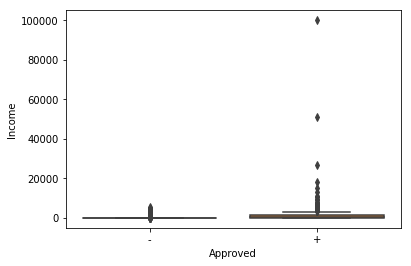

In [36]:
sns.boxplot(x="Approved", y="Income", data=train_df)

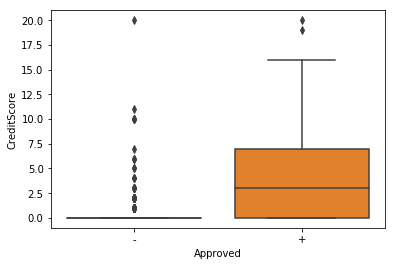

In [37]:
sns.boxplot(x="Approved", y="CreditScore", data=train_df)

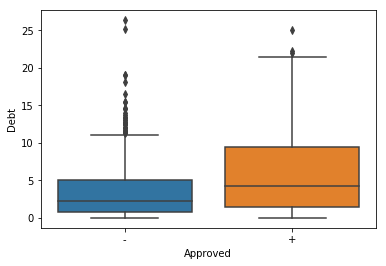

In [38]:
sns.boxplot(x="Approved", y="Debt", data=train_df)

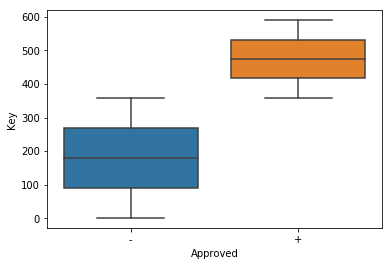

In [39]:
sns.boxplot(x="Approved", y="Key", data=train_df)

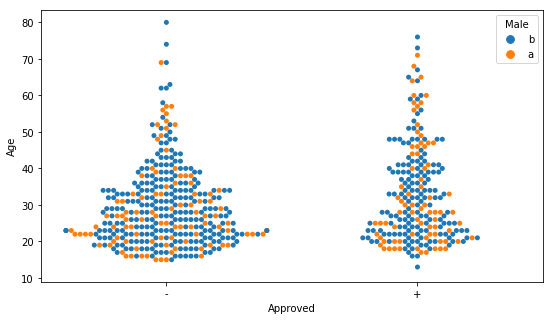

In [40]:
fig, ax = plt.subplots(figsize=(9,5))
sns.swarmplot(x="Approved", y="Age", hue="Male", data=train_df);

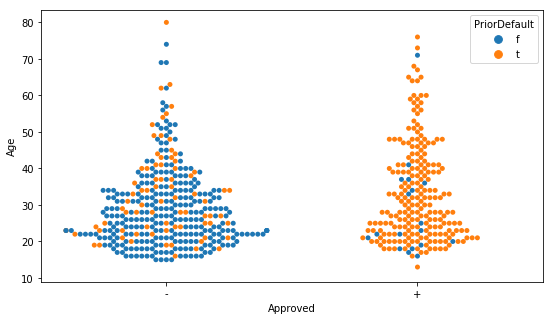

In [41]:
fig, ax = plt.subplots(figsize=(9,5))
sns.swarmplot(x="Approved", y="Age", hue="PriorDefault", data=train_df);

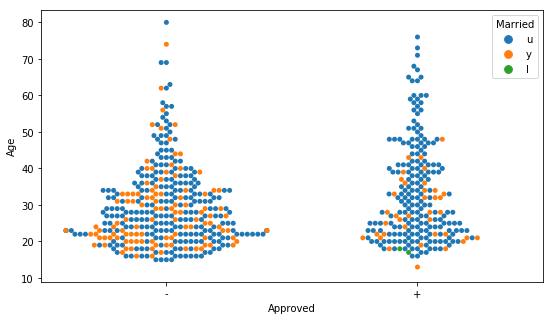

In [42]:
fig, ax = plt.subplots(figsize=(9,5))
sns.swarmplot(x="Approved", y="Age", hue="Married", data=train_df);

In [44]:
train_df = train_df.drop(['Key'], axis=1)
test_df = test_df.drop(['Key'], axis=1)

In [43]:

train_df = train_df.drop(['ZipCode'], axis=1)
test_df = test_df.drop(['ZipCode'], axis=1)

In [45]:
genders = {"a": 0, "b": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Male'] = dataset['Male'].map(genders)

In [46]:
married  = {"u": 0, "y": 1, "l": 2, "t": 3}
data = [train_df, test_df]

for dataset in data:
    dataset['Married'] = dataset['Married'].map(married)

In [47]:
bankCustomer= {"g": 0, "p": 1, "gg": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['BankCustomer'] = dataset['BankCustomer'].map(bankCustomer)

In [48]:
#EducationLevel (c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff)

educationLevel = {"c": 0, "d": 1, "cc": 2,"i": 3, "j": 4, "k": 5,"m": 6, "r": 7, "q": 8,
                 "w": 9, "x": 10, "e": 11,"aa": 12, "ff": 13}
data = [train_df, test_df]

for dataset in data:
    dataset['EducationLevel'] = dataset['EducationLevel'].map(educationLevel)

In [49]:
#Ethnicity (v, h, bb, j, n, z, dd, ff, o)

ethnicity = {"v": 0, "h": 1, "bb": 2,"j": 3, "n": 4, "z": 5,"dd": 6, "ff": 7, "o": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Ethnicity'] = dataset['Ethnicity'].map(ethnicity)
    

In [50]:
#PriorDefault

priorDefault = {"f": 0, "t": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['PriorDefault'] = dataset['PriorDefault'].map(priorDefault)

In [51]:
#Employed 

employed = {"f": 0, "t": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Employed'] = dataset['Employed'].map(employed)

In [52]:
#DriversLicense  

driversLicense = {"f": 0, "t": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['DriversLicense'] = dataset['DriversLicense'].map(driversLicense)

In [53]:
#Citizen (g, p, s)  

citizen = {"g": 0, "p": 1,"s": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Citizen'] = dataset['Citizen'].map(citizen)

In [54]:
approved= {"-": 0,"+": 1}
data = [train_df]

for dataset in data:
    dataset['Approved']=dataset['Approved'].map(approved)

In [55]:
train_df['Approved'].value_counts()

0    358
1    232
Name: Approved, dtype: int64

In [56]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

train_df['Age'].value_counts()

3    119
2    115
4    107
6    105
5     88
1     56
Name: Age, dtype: int64

In [57]:
train_df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,5,3.500,0,0,3,2,0.500,0,0,0,0,2,0,0
1,1,4,1.500,0,0,0,0,0.250,0,0,0,1,0,122,0
2,1,4,0.585,0,0,12,0,0.040,0,0,0,0,0,1004,0
3,1,4,0.665,0,0,9,0,0.250,0,0,0,1,0,0,0
4,1,3,2.710,1,1,0,0,0.085,0,0,0,0,2,0,0


In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 15 columns):
Male              590 non-null int64
Age               590 non-null int32
Debt              590 non-null float64
Married           590 non-null int64
BankCustomer      590 non-null int64
EducationLevel    590 non-null int64
Ethnicity         590 non-null int64
YearsEmployed     590 non-null float64
PriorDefault      590 non-null int64
Employed          590 non-null int64
CreditScore       590 non-null int64
DriversLicense    590 non-null int64
Citizen           590 non-null int64
Income            590 non-null int64
Approved          590 non-null int64
dtypes: float64(2), int32(1), int64(12)
memory usage: 66.9 KB


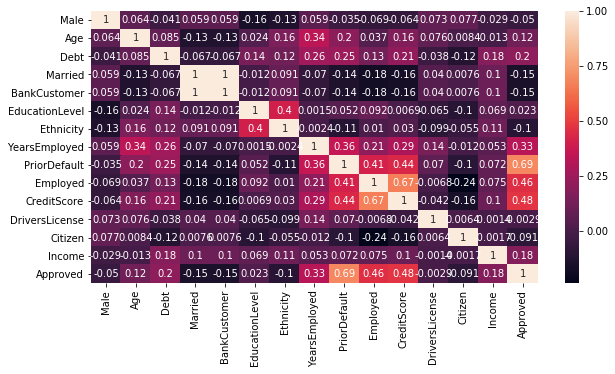

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(train_df.corr(), annot=True)

# Approval prediction

1.	Apply logistic regression to predict approval using test file and save your results in a csv file.

In [60]:


X_train = train_df.drop("Approved", axis=1)
y_train = train_df["Approved"]
X_test  = test_df

In [61]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

print("Prediction Accuracy: ",acc_log)

Prediction Accuracy:  86.44


C:\Users\shrougalbahoth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [62]:
log_model=logreg.predict(X_test)
log_model

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [63]:
log_model.shape

(100,)

In [64]:
X_test.shape

(100, 14)

In [65]:
LogisticRegression_df=X_test.copy()

In [66]:
LogisticRegression_df['Approved'] = log_model

export_csv = LogisticRegression_df.to_csv (r'C:\Users\shrougalbahoth\Downloads\LogisticRegression(df).csv',index = None, header=True)



Explore the relationship and correlations between the variables and approved column

In [67]:
feature_cols = ['PriorDefault']
x_train = train_df[feature_cols]

logreg = LogisticRegression()
logreg.fit(x_train, y_train)



#2.How accurate is your code in prediction?
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_log)

Prediction Accuracy:  83.9


C:\Users\shrougalbahoth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
feature_cols = ['PriorDefault','Employed','CreditScore']
x_train = train_df[feature_cols]

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_log)

Prediction Accuracy:  83.9


C:\Users\shrougalbahoth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


3.Apply SVM to predict approval using test file and save your results in a csv file.

In [69]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

C:\Users\shrougalbahoth\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [70]:

#2.How accurate is your code in prediction?

acc_model = round(model.score(X_train, y_train) * 100, 2)

print("Prediction Accuracy: ",acc_model)

Prediction Accuracy:  94.58


In [71]:
SVMmodel=model.predict(X_test)
SVMmodel

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [72]:
SVMdf=X_test.copy()

In [73]:
SVMdf['Approved'] = SVMmodel

export_csv = SVMdf.to_csv (r'C:\Users\shrougalbahoth\Downloads\SVM(df).csv', index = None, header=True)

4.Experiment with different parameters in SVM (Parameter tuning for SVC)

In [74]:
#try diffierent parameters
model = SVC(C=0.10)
model.fit(X_train, y_train)
acc_model = round(model.score(X_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_model)


Prediction Accuracy:  60.68


C:\Users\shrougalbahoth\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [75]:
#try diffierent parameters
model = SVC(C=10)
model.fit(X_train, y_train)
acc_model = round(model.score(X_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_model)

Prediction Accuracy:  99.32


C:\Users\shrougalbahoth\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [76]:
#try diffierent parameters
model = SVC(C=100)
model.fit(X_train, y_train)
acc_model = round(model.score(X_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_model)


Prediction Accuracy:  99.66


C:\Users\shrougalbahoth\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [77]:
#try diffierent parameters
model = SVC(C=1000)
model.fit(X_train, y_train)
acc_model = round(model.score(X_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_model)


Prediction Accuracy:  99.83


C:\Users\shrougalbahoth\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [78]:
#try diffierent parameters
model = SVC(gamma=0.01)
model.fit(X_train, y_train)
acc_model = round(model.score(X_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_model)

Prediction Accuracy:  87.63


In [79]:
#try diffierent parameters
model = SVC(gamma=0.1)
model.fit(X_train, y_train)
acc_model = round(model.score(X_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_model)

Prediction Accuracy:  97.12


In [80]:
#try diffierent parameters
model = SVC(gamma=1)
model.fit(X_train, y_train)
acc_model = round(model.score(X_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_model)


Prediction Accuracy:  99.66


In [81]:
#try diffierent parameters
model = SVC(gamma=10)
model.fit(X_train, y_train)
acc_model = round(model.score(X_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_model)


Prediction Accuracy:  99.66


In [82]:
#try diffierent parameters
model = SVC(gamma=100)
model.fit(X_train, y_train)
acc_model = round(model.score(X_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_model)


Prediction Accuracy:  99.83


In [83]:
#try diffierent parameters
model = SVC(gamma=1000)
model.fit(X_train, y_train)
acc_model = round(model.score(X_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_model)


Prediction Accuracy:  99.83


In [84]:
#try diffierent parameters
model = SVC(kernel='linear')
model.fit(X_train, y_train)
acc_model = round(model.score(X_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_model)


Prediction Accuracy:  85.76


In [85]:
model = SVC(kernel='rbf')
model.fit(X_train, y_train)
acc_model = round(model.score(X_train, y_train) * 100, 2)
print("Prediction Accuracy: ",acc_model)

Prediction Accuracy:  94.58


C:\Users\shrougalbahoth\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


5.Split train file into train/test and 
apply both logistic regression and SVM 
and compare the accuracy you get from each model. 

In [86]:
#Option 2:

from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Approved',axis=1), 
                                                    train_df['Approved'], test_size=0.30, 
                                                    random_state=42)

In [87]:
X_train.shape

(413, 14)

In [88]:
y_train.shape

(413,)

In [89]:
X_test.shape

(177, 14)

In [90]:
y_test.shape

(177,)

In [91]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log1 = round(logreg.score(X_train, y_train) * 100, 2)
acc_log2 = round(metrics.accuracy_score(Y_pred, y_test) * 100, 2)

print("Prediction Accuracy: ",acc_log1,acc_log2)

Prediction Accuracy:  86.44 84.75


C:\Users\shrougalbahoth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [92]:
from sklearn.svm import SVC

svc =SVC()
svc.fit(X_train, y_train)

Y_pred =svc.predict(X_test)

acc_svc1 = round(svc.score(X_train, y_train) * 100, 2)
acc_svc2 = round(metrics.accuracy_score(Y_pred, y_test) * 100, 2)

print("Prediction Accuracy: ",acc_svc1,acc_svc2)

Prediction Accuracy:  96.37 67.23


C:\Users\shrougalbahoth\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Clustering

1.Apply K-means clustering to group data points, use SC (silhouette coefficient) to find the optimal number of K for the dataset

In [93]:
from sklearn.cluster import KMeans

X = np.array(train_df.drop(['Approved'], 1).astype(float))
X

array([[1.000e+00, 5.000e+00, 3.500e+00, ..., 0.000e+00, 2.000e+00,
        0.000e+00],
       [1.000e+00, 4.000e+00, 1.500e+00, ..., 1.000e+00, 0.000e+00,
        1.220e+02],
       [1.000e+00, 4.000e+00, 5.850e-01, ..., 0.000e+00, 0.000e+00,
        1.004e+03],
       ...,
       [1.000e+00, 1.000e+00, 4.000e-02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.000e+00, 1.650e-01, ..., 1.000e+00, 2.000e+00,
        0.000e+00],
       [0.000e+00, 3.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [94]:

from sklearn.metrics import silhouette_score
k=range(1,10)
sil = []
kmax = range(2, 10+1)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in kmax:
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))

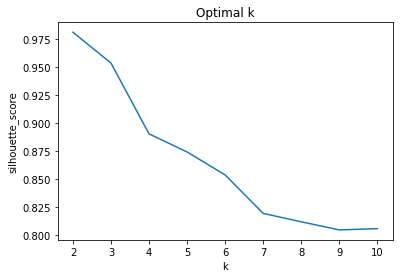

In [95]:
plt.plot(kmax, sil)
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Optimal k')
plt.show()

In [96]:

range_n_clusters = list (range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.9812112669870982)
For n_clusters = 3, silhouette score is 0.9536284179565666)
For n_clusters = 4, silhouette score is 0.8903972797185989)
For n_clusters = 5, silhouette score is 0.8742305076649033)
For n_clusters = 6, silhouette score is 0.8557955205082992)
For n_clusters = 7, silhouette score is 0.8193475016953948)
For n_clusters = 8, silhouette score is 0.8118336807564762)
For n_clusters = 9, silhouette score is 0.8045740375467474)


2.	What is the optimal K? 2

In [97]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [98]:
print(kmeans.cluster_centers_)  

[[6.97278912e-01 3.62925170e+00 4.57404762e+00 2.55102041e-01
  2.55102041e-01 5.87244898e+00 1.20238095e+00 2.08458333e+00
  4.93197279e-01 4.06462585e-01 2.04251701e+00 4.45578231e-01
  1.88775510e-01 6.64858844e+02]
 [5.00000000e-01 3.50000000e+00 1.50000000e+01 1.00000000e+00
  1.00000000e+00 1.20000000e+01 5.00000000e+00 3.25000000e+00
  5.00000000e-01 5.00000000e-01 3.00000000e+00 5.00000000e-01
  5.00000000e-01 7.55500000e+04]]


3.How good K-means in clustering data points into two groups approved/not approved?  

In [99]:
y = np.array(train_df['Approved'])

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print("Clustring Accuracy: ",correct/float(len(X))*100)

Clustring Accuracy:  61.016949152542374


In [102]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [103]:
y = np.array(train_df['Approved'])

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print("Clustring Accuracy: ",correct/float(len(X))*100)

Clustring Accuracy:  60.84745762711864
